In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
boxer1 = pd.read_csv('UFC fight data 1993 to 2019.csv')

In [3]:
boxer1.info(verbose = 'True', null_counts = 'True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 145 columns):
R_fighter                       5144 non-null object
B_fighter                       5144 non-null object
Referee                         5121 non-null object
date                            5144 non-null object
location                        5144 non-null object
Winner                          5144 non-null object
title_bout                      5144 non-null bool
weight_class                    5144 non-null object
no_of_rounds                    5144 non-null int64
B_current_lose_streak           5144 non-null int64
B_current_win_streak            5144 non-null int64
B_draw                          5144 non-null int64
B_avg_BODY_att                  3879 non-null float64
B_avg_BODY_landed               3879 non-null float64
B_avg_CLINCH_att                3879 non-null float64
B_avg_CLINCH_landed             3879 non-null float64
B_avg_DISTANCE_att              3879 non-null 

Column definitions:
•	R_ and B_ prefix signifies red and blue corner fighter stats respectively
•	_opp_ containing columns is the average of damage done by the opponent on the fighter
•	KD is number of knockdowns
•	SIG_STR is no. of significant strikes 'landed of attempted'
•	SIG_STR_pct is significant strikes percentage
•	TOTAL_STR is total strikes 'landed of attempted'
•	TD is no. of takedowns
•	TD_pct is takedown percentages
•	SUB_ATT is no. of submission attempts
•	PASS is no. times the guard was passed?
•	REV is the no. of Reversals landed
•	HEAD is no. of significant strinks to the head 'landed of attempted'
•	BODY is no. of significant strikes to the body 'landed of attempted'
•	CLINCH is no. of significant strikes in the clinch 'landed of attempted'
•	GROUND is no. of significant strikes on the ground 'landed of attempted'
•	win_by is method of win
•	last_round is last round of the fight (ex. if it was a KO in 1st, then this will be 1)
•	last_round_time is when the fight ended in the last round
•	Format is the format of the fight (3 rounds, 5 rounds etc.)
•	Referee is the name of the Ref
•	date is the date of the fight
•	location is the location in which the event took place
•	Fight_type is which weight class and whether it's a title bout or not
•	Winner is the winner of the fight
•	Stance is the stance of the fighter (orthodox, southpaw, etc.)
•	Height_cms is the height in centimeter
•	Reach_cms is the reach of the fighter (arm span) in centimeter
•	Weight_lbs is the weight of the fighter in pounds (lbs)
•	age is the age of the fighter
•	title_bout Boolean value of whether it is title fight or not
•	weight_class is which weight class the fight is in (Bantamweight, heavyweight, Women's flyweight, etc.)
•	no_of_rounds is the number of rounds the fight was scheduled for
•	current_lose_streak is the count of current concurrent losses of the fighter
•	current_win_streak is the count of current concurrent wins of the fighter
•	draw is the number of draws in the fighter's ufc career
•	wins is the number of wins in the fighter's ufc career
•	losses is the number of losses in the fighter's ufc career
•	total_rounds_fought is the average of total rounds fought by the fighter
•	total_time_fought(seconds) is the count of total time spent fighting in seconds
•	total_title_bouts is the total number of title bouts taken part in by the fighter
•	win_by_Decision_Majority is the number of wins by majority judges decision in the fighter's ufc career
•	win_by_Decision_Split is the number of wins by split judges decision in the fighter's ufc career
•	win_by_Decision_Unanimous is the number of wins by unanimous judges decision in the fighter's ufc career
•	win_by_KO/TKO is the number of wins by knockout in the fighter's ufc career
•	win_by_Submission is the number of wins by submission in the fighter's ufc career
•	win_by_TKO_Doctor_Stoppage is the number of wins by doctor stoppage in the fighter's ufc career


In [4]:
#Drop unnecessary columns

drop_columns = ['Referee', 'date', 'location', 'title_bout', 'no_of_rounds', 'weight_class', 'B_avg_opp_BODY_att', 'R_avg_opp_BODY_landed', 'R_avg_opp_BODY_landed','R_avg_opp_CLINCH_att', 'R_avg_opp_CLINCH_landed','R_avg_opp_DISTANCE_att',  'R_avg_opp_DISTANCE_landed', 'R_avg_opp_GROUND_att', 'R_avg_opp_GROUND_landed','R_avg_opp_HEAD_att', 'R_avg_opp_HEAD_landed', 'R_avg_opp_KD', 'R_avg_opp_LEG_att', 'R_avg_opp_LEG_landed', 'R_avg_opp_PASS', 'R_avg_opp_REV', 'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed', 'R_avg_opp_SIG_STR_pct', 'R_avg_opp_SUB_ATT', 'R_avg_opp_TD_att', 'R_avg_opp_TD_landed', 'R_avg_opp_TD_pct', 'R_avg_opp_TOTAL_STR_att']
boxer1 = boxer1.drop(columns = drop_columns)


In [5]:
drop_more = ['B_avg_opp_BODY_landed', 'B_avg_opp_CLINCH_att','B_avg_opp_CLINCH_landed','B_avg_opp_DISTANCE_att','B_avg_opp_DISTANCE_landed','B_avg_opp_GROUND_att','B_avg_opp_GROUND_landed', 'B_avg_opp_HEAD_att','B_avg_opp_HEAD_landed','B_avg_opp_KD','B_avg_opp_LEG_att','B_avg_opp_LEG_landed', 'B_avg_opp_PASS', 'B_avg_opp_REV','B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed', 'B_avg_opp_SIG_STR_pct', 'B_avg_opp_SUB_ATT', 'B_avg_opp_TD_att', 'B_avg_opp_TD_landed','B_avg_opp_TD_pct', 'B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed']
boxer1 = boxer1.drop(columns = drop_more)


In [6]:
boxer1.info(verbose = 'True', null_counts = 'True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 93 columns):
R_fighter                       5144 non-null object
B_fighter                       5144 non-null object
Winner                          5144 non-null object
B_current_lose_streak           5144 non-null int64
B_current_win_streak            5144 non-null int64
B_draw                          5144 non-null int64
B_avg_BODY_att                  3879 non-null float64
B_avg_BODY_landed               3879 non-null float64
B_avg_CLINCH_att                3879 non-null float64
B_avg_CLINCH_landed             3879 non-null float64
B_avg_DISTANCE_att              3879 non-null float64
B_avg_DISTANCE_landed           3879 non-null float64
B_avg_GROUND_att                3879 non-null float64
B_avg_GROUND_landed             3879 non-null float64
B_avg_HEAD_att                  3879 non-null float64
B_avg_HEAD_landed               3879 non-null float64
B_avg_KD                        3879 n

In [7]:
drop_moreb = ['B_draw', 'B_avg_PASS', 'B_avg_REV', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg_HEAD_att', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_SIG_STR_att', 'B_avg_SUB_ATT', 'B_avg_TD_att', 'B_avg_TD_pct', 'B_avg_SIG_STR_pct', 'B_avg_TOTAL_STR_att', 'B_total_rounds_fought', 'B_total_time_fought(seconds)', 'B_win_by_Decision_Majority', 'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_Submission', 'B_win_by_TKO_Doctor_Stoppage']
boxer1 = boxer1.drop(columns = drop_moreb)



In [8]:
drop_morer = ['R_draw', 'R_avg_PASS', 'R_avg_REV', 'R_avg_BODY_att', 'R_avg_BODY_landed', 'R_avg_CLINCH_att', 'R_avg_CLINCH_landed', 'R_avg_DISTANCE_att', 'R_avg_DISTANCE_landed', 'R_avg_GROUND_att', 'R_avg_GROUND_landed', 'R_avg_HEAD_att', 'R_avg_LEG_att', 'R_avg_LEG_landed', 'R_avg_SIG_STR_att', 'R_avg_SUB_ATT', 'R_avg_TD_att', 'R_avg_TD_pct', 'R_avg_SIG_STR_pct', 'R_avg_TOTAL_STR_att', 'R_total_rounds_fought', 'R_total_time_fought(seconds)', 'R_win_by_Decision_Majority', 'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 'R_win_by_Submission', 'R_win_by_TKO_Doctor_Stoppage']
boxer1 = boxer1.drop(columns = drop_morer)

In [9]:
boxer1.info(verbose = 'True', null_counts = 'True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 39 columns):
R_fighter                     5144 non-null object
B_fighter                     5144 non-null object
Winner                        5144 non-null object
B_current_lose_streak         5144 non-null int64
B_current_win_streak          5144 non-null int64
B_avg_HEAD_landed             3879 non-null float64
B_avg_KD                      3879 non-null float64
B_avg_SIG_STR_landed          3879 non-null float64
B_avg_TD_landed               3879 non-null float64
B_avg_TOTAL_STR_landed        3879 non-null float64
B_longest_win_streak          5144 non-null int64
B_losses                      5144 non-null int64
B_total_title_bouts           5144 non-null int64
B_win_by_KO/TKO               5144 non-null int64
B_wins                        5144 non-null int64
B_Stance                      4985 non-null object
B_Height_cms                  5136 non-null float64
B_Reach_cms                

In [10]:
#isolate winner data and drop opponent data by splitting dataframe into 2, dropping opponent data columns, and stacking
#winner to create a winners only dataframe

rwinners = boxer1[boxer1['Winner'] == 'Red']

bwinners = boxer1[boxer1['Winner'] == 'Blue']



In [11]:
print(bwinners.columns)

Index(['R_fighter', 'B_fighter', 'Winner', 'B_current_lose_streak',
       'B_current_win_streak', 'B_avg_HEAD_landed', 'B_avg_KD',
       'B_avg_SIG_STR_landed', 'B_avg_TD_landed', 'B_avg_TOTAL_STR_landed',
       'B_longest_win_streak', 'B_losses', 'B_total_title_bouts',
       'B_win_by_KO/TKO', 'B_wins', 'B_Stance', 'B_Height_cms', 'B_Reach_cms',
       'B_Weight_lbs', 'R_current_lose_streak', 'R_current_win_streak',
       'R_avg_HEAD_landed', 'R_avg_KD', 'R_avg_SIG_STR_landed',
       'R_avg_TD_landed', 'R_avg_TOTAL_STR_landed', 'R_longest_win_streak',
       'R_losses', 'R_avg_opp_BODY_att', 'R_avg_opp_TOTAL_STR_landed',
       'R_total_title_bouts', 'R_win_by_KO/TKO', 'R_wins', 'R_Stance',
       'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object')


In [12]:
bwinners = bwinners.drop(columns = ['R_fighter', 'Winner','R_current_lose_streak', 'R_current_win_streak','R_avg_HEAD_landed', 'R_avg_KD', 'R_avg_SIG_STR_landed','R_avg_TD_landed', 'R_avg_TOTAL_STR_landed', 'R_longest_win_streak','R_losses', 'R_avg_opp_BODY_att', 'R_avg_opp_TOTAL_STR_landed','R_total_title_bouts', 'R_win_by_KO/TKO', 'R_wins', 'R_Stance','R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'R_age' ])


In [13]:
rwinners = rwinners.drop(columns = ['B_fighter', 'Winner','B_current_lose_streak','B_current_win_streak', 'B_avg_HEAD_landed', 'B_avg_KD','B_avg_SIG_STR_landed', 'B_avg_TD_landed', 'B_avg_TOTAL_STR_landed','B_longest_win_streak', 'B_losses', 'B_total_title_bouts','B_win_by_KO/TKO', 'B_wins', 'B_Stance', 'B_Height_cms', 'B_Reach_cms','B_Weight_lbs', 'B_age'])

In [14]:
#create list of common column headers and re-assign to both dataframes

print(bwinners.columns)

Index(['B_fighter', 'B_current_lose_streak', 'B_current_win_streak',
       'B_avg_HEAD_landed', 'B_avg_KD', 'B_avg_SIG_STR_landed',
       'B_avg_TD_landed', 'B_avg_TOTAL_STR_landed', 'B_longest_win_streak',
       'B_losses', 'B_total_title_bouts', 'B_win_by_KO/TKO', 'B_wins',
       'B_Stance', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'B_age'],
      dtype='object')


In [15]:
#rankings_pd.rename(columns = {'test':'TEST', 'odi':'ODI','t20':'T20'}, inplace = True) 

bwinners.rename(columns = {
    'B_fighter':'fighter', 
    'B_current_lose_streak':'current_lose_streak', 
    'B_current_win_streak':'current_win_streak',
    'B_avg_HEAD_landed':'avg_head_landed', 
    'B_avg_KD':'avg_KD', 
    'B_avg_SIG_STR_landed':'avg_sig_str_landed',
    'B_avg_TD_landed':'avg_td_landed', 
    'B_avg_TOTAL_STR_landed':'avg_total_str_landed', 
    'B_longest_win_streak':'longest_winning_streak',
    'B_losses':'losses', 
    'B_total_title_bouts':'total_title_bouts', 
    'B_win_by_KO/TKO':'win_by_ko/tko', 
    'B_wins':'wins',
    'B_Stance':'stance', 
    'B_Height_cms':'height_cms', 
    'B_Reach_cms':'reach_cms', 
    'B_Weight_lbs':'weight_lbs', 
    'B_age':'age'}, inplace = True)

In [16]:
rwinners = rwinners.drop(columns = ['R_avg_opp_BODY_att', 'R_avg_opp_TOTAL_STR_landed'])

In [17]:
print(rwinners.columns)

Index(['R_fighter', 'R_current_lose_streak', 'R_current_win_streak',
       'R_avg_HEAD_landed', 'R_avg_KD', 'R_avg_SIG_STR_landed',
       'R_avg_TD_landed', 'R_avg_TOTAL_STR_landed', 'R_longest_win_streak',
       'R_losses', 'R_total_title_bouts', 'R_win_by_KO/TKO', 'R_wins',
       'R_Stance', 'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'R_age'],
      dtype='object')


In [18]:
rwinners.rename(columns = {
    'R_fighter':'fighter', 
    'R_current_lose_streak':'current_lose_streak', 
    'R_current_win_streak':'current_win_streak',
    'R_avg_HEAD_landed':'avg_head_landed', 
    'R_avg_KD':'avg_KD', 
    'R_avg_SIG_STR_landed':'avg_sig_str_landed',
    'R_avg_TD_landed':'avg_td_landed', 
    'R_avg_TOTAL_STR_landed':'avg_total_str_landed', 
    'R_longest_win_streak':'longest_winning_streak',
    'R_losses':'losses', 
    'R_total_title_bouts':'total_title_bouts', 
    'R_win_by_KO/TKO':'win_by_ko/tko', 
    'R_wins':'wins',
    'R_Stance':'stance', 
    'R_Height_cms':'height_cms', 
    'R_Reach_cms':'reach_cms', 
    'R_Weight_lbs':'weight_lbs', 
    'R_age':'age'}, inplace = True)


In [19]:
#check to make sure column headers the same for both dataframes

print(rwinners.columns)
print(bwinners.columns)

Index(['fighter', 'current_lose_streak', 'current_win_streak',
       'avg_head_landed', 'avg_KD', 'avg_sig_str_landed', 'avg_td_landed',
       'avg_total_str_landed', 'longest_winning_streak', 'losses',
       'total_title_bouts', 'win_by_ko/tko', 'wins', 'stance', 'height_cms',
       'reach_cms', 'weight_lbs', 'age'],
      dtype='object')
Index(['fighter', 'current_lose_streak', 'current_win_streak',
       'avg_head_landed', 'avg_KD', 'avg_sig_str_landed', 'avg_td_landed',
       'avg_total_str_landed', 'longest_winning_streak', 'losses',
       'total_title_bouts', 'win_by_ko/tko', 'wins', 'stance', 'height_cms',
       'reach_cms', 'weight_lbs', 'age'],
      dtype='object')


In [20]:
#concat winner dataframes into one of all winners

winners = pd.concat([rwinners, bwinners], ignore_index = 'True')
winners

,fighter,current_lose_streak,current_win_streak,avg_head_landed,avg_KD,avg_sig_str_landed,avg_td_landed,avg_total_str_landed,longest_winning_streak,losses,total_title_bouts,win_by_ko/tko,wins,stance,height_cms,reach_cms,weight_lbs,age
0,Henry Cejudo,0,4,23.900000,0.40,44.000000,1.900000,69.100000,4,2,3,2,8,Orthodox,162.56,162.56,135.0,32.0
1,Valentina Shevchenko,0,2,37.000000,0.00,59.428571,2.428571,102.857143,2,2,2,0,5,Southpaw,165.10,167.64,125.0,31.0
2,Tony Ferguson,0,11,35.600000,0.20,55.466667,0.400000,63.400000,11,1,2,3,14,Orthodox,180.34,193.04,155.0,35.0
3,Tatiana Suarez,0,4,31.250000,0.00,42.750000,4.500000,80.500000,4,0,1,1,4,NaN,165.10,167.64,115.0,28.0
4,Aljamain Sterling,0,3,23.333333,0.00,52.250000,1.750000,85.750000,4,3,0,1,9,Orthodox,170.18,180.34,135.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5056,Jared Hamman,1,0,3.000000,0.00,6.000000,0.000000,6.000000,0,1,0,0,0,Orthodox,190.50,190.50,185.0,28.0
5057,Jon Jones,1,0,23.250000,0.25,39.000000,2.500000,54.500000,3,1,0,0,3,Orthodox,193.04,213.36,205.0,22.0
5058,Vladimir Matyushenko,0,1,16.500000,0.00,22.166667,2.500000,79.500000,2,2,1,1,4,Orthodox,182.88,187.96,205.0,39.0
5059,Darren Elkins,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,Orthodox,177.80,180.34,145.0,25.0


In [21]:
winners.info(verbose = 'True', null_counts = 'True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5061 entries, 0 to 5060
Data columns (total 18 columns):
fighter                   5061 non-null object
current_lose_streak       5061 non-null int64
current_win_streak        5061 non-null int64
avg_head_landed           4232 non-null float64
avg_KD                    4232 non-null float64
avg_sig_str_landed        4232 non-null float64
avg_td_landed             4232 non-null float64
avg_total_str_landed      4232 non-null float64
longest_winning_streak    5061 non-null int64
losses                    5061 non-null int64
total_title_bouts         5061 non-null int64
win_by_ko/tko             5061 non-null int64
wins                      5061 non-null int64
stance                    4946 non-null object
height_cms                5059 non-null float64
reach_cms                 4768 non-null float64
weight_lbs                5059 non-null float64
age                       4999 non-null float64
dtypes: float64(9), int64(7), object(2)
memor

In [22]:
# drop NaN values

winners = winners.dropna()

In [23]:
# check new dataframe for NaN

winners.info(verbose = 'True', null_counts = 'True')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3990 entries, 0 to 5060
Data columns (total 18 columns):
fighter                   3990 non-null object
current_lose_streak       3990 non-null int64
current_win_streak        3990 non-null int64
avg_head_landed           3990 non-null float64
avg_KD                    3990 non-null float64
avg_sig_str_landed        3990 non-null float64
avg_td_landed             3990 non-null float64
avg_total_str_landed      3990 non-null float64
longest_winning_streak    3990 non-null int64
losses                    3990 non-null int64
total_title_bouts         3990 non-null int64
win_by_ko/tko             3990 non-null int64
wins                      3990 non-null int64
stance                    3990 non-null object
height_cms                3990 non-null float64
reach_cms                 3990 non-null float64
weight_lbs                3990 non-null float64
age                       3990 non-null float64
dtypes: float64(9), int64(7), object(2)
memor

In [24]:
#look for outliers and data spread

winners.describe()

,current_lose_streak,current_win_streak,avg_head_landed,avg_KD,avg_sig_str_landed,avg_td_landed,avg_total_str_landed,longest_winning_streak,losses,total_title_bouts,win_by_ko/tko,wins,height_cms,reach_cms,weight_lbs,age
count,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000
mean,0.582707,1.208521,21.159645,0.264566,32.582153,1.351676,52.650769,2.487218,2.054637,0.569674,1.354887,3.885213,179.348827,184.163368,171.047870,29.290977
std,0.805815,1.643184,12.428421,0.333855,17.648262,1.305601,26.719843,1.943476,1.947808,1.554406,1.757089,3.510020,8.629684,10.342493,33.482172,3.983205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,19.000000
25%,0.000000,0.000000,13.000000,0.000000,20.333333,0.375000,34.804545,1.000000,1.000000,0.000000,0.000000,1.000000,172.720000,177.800000,145.000000,26.000000
50%,0.000000,1.000000,19.000000,0.166667,29.767857,1.000000,49.563492,2.000000,2.000000,0.000000,1.000000,3.000000,180.340000,185.420000,170.000000,29.000000
75%,1.000000,2.000000,27.000000,0.416667,42.495690,2.000000,66.870536,3.000000,3.000000,1.000000,2.000000,6.000000,185.420000,190.500000,185.000000,32.000000
max,6.000000,15.000000,119.000000,4.000000,141.000000,11.000000,202.500000,16.000000,13.000000,16.000000,11.000000,22.000000,210.820000,213.360000,265.000000,47.000000


In [25]:
# reset index to be sequential - set new index and drop old index

winners = winners.reset_index()

In [26]:
winners = winners.drop(columns = ['index'])

In [27]:
# check index

winners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3990 entries, 0 to 3989
Data columns (total 18 columns):
fighter                   3990 non-null object
current_lose_streak       3990 non-null int64
current_win_streak        3990 non-null int64
avg_head_landed           3990 non-null float64
avg_KD                    3990 non-null float64
avg_sig_str_landed        3990 non-null float64
avg_td_landed             3990 non-null float64
avg_total_str_landed      3990 non-null float64
longest_winning_streak    3990 non-null int64
losses                    3990 non-null int64
total_title_bouts         3990 non-null int64
win_by_ko/tko             3990 non-null int64
wins                      3990 non-null int64
stance                    3990 non-null object
height_cms                3990 non-null float64
reach_cms                 3990 non-null float64
weight_lbs                3990 non-null float64
age                       3990 non-null float64
dtypes: float64(9), int64(7), object(2)
memor

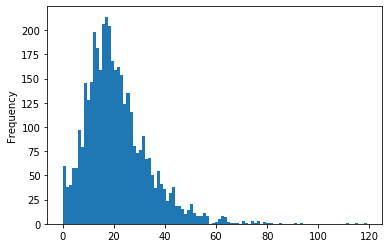

In [28]:
# create plots and manipulations to check for outliers and spread

winners.avg_head_landed.plot(kind = 'hist', bins = 100)

In [29]:
winners['total_fights'] = winners['wins'] + winners['losses']

In [30]:
winners.describe()

,current_lose_streak,current_win_streak,avg_head_landed,avg_KD,avg_sig_str_landed,avg_td_landed,avg_total_str_landed,longest_winning_streak,losses,total_title_bouts,win_by_ko/tko,wins,height_cms,reach_cms,weight_lbs,age,total_fights
count,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000
mean,0.582707,1.208521,21.159645,0.264566,32.582153,1.351676,52.650769,2.487218,2.054637,0.569674,1.354887,3.885213,179.348827,184.163368,171.047870,29.290977,5.939850
std,0.805815,1.643184,12.428421,0.333855,17.648262,1.305601,26.719843,1.943476,1.947808,1.554406,1.757089,3.510020,8.629684,10.342493,33.482172,3.983205,4.967974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,19.000000,1.000000
25%,0.000000,0.000000,13.000000,0.000000,20.333333,0.375000,34.804545,1.000000,1.000000,0.000000,0.000000,1.000000,172.720000,177.800000,145.000000,26.000000,2.000000
50%,0.000000,1.000000,19.000000,0.166667,29.767857,1.000000,49.563492,2.000000,2.000000,0.000000,1.000000,3.000000,180.340000,185.420000,170.000000,29.000000,4.000000
75%,1.000000,2.000000,27.000000,0.416667,42.495690,2.000000,66.870536,3.000000,3.000000,1.000000,2.000000,6.000000,185.420000,190.500000,185.000000,32.000000,8.000000
max,6.000000,15.000000,119.000000,4.000000,141.000000,11.000000,202.500000,16.000000,13.000000,16.000000,11.000000,22.000000,210.820000,213.360000,265.000000,47.000000,31.000000


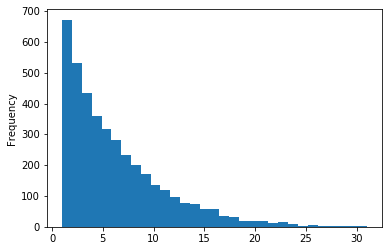

In [31]:
winners.total_fights.plot(kind = 'hist', bins = 31)

In [32]:
# eliminate statistically irrelevant values, eliminate rows with values averaged over less than 4 fights

low_value_counts = winners[winners['total_fights'] < 5]

In [33]:
low_value_counts.describe()

,current_lose_streak,current_win_streak,avg_head_landed,avg_KD,avg_sig_str_landed,avg_td_landed,avg_total_str_landed,longest_winning_streak,losses,total_title_bouts,win_by_ko/tko,wins,height_cms,reach_cms,weight_lbs,age,total_fights
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.00000,1997.000000,1997.000000,1997.000000,1997.000000,1997.00000
mean,0.523285,0.929394,20.684861,0.245744,31.685194,1.307253,51.403105,1.272409,0.866299,0.137206,0.454682,1.37356,178.803535,183.388763,168.401602,28.014522,2.23986
std,0.687772,1.025976,14.766555,0.405181,20.522243,1.502157,31.102062,0.959555,0.777083,0.396885,0.679336,1.01228,8.632914,10.426581,33.922373,3.612116,1.10249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,152.400000,152.400000,115.000000,19.000000,1.00000
25%,0.000000,0.000000,10.333333,0.000000,17.000000,0.000000,28.500000,1.000000,0.000000,0.000000,0.000000,1.00000,172.720000,177.800000,145.000000,25.000000,1.00000
50%,0.000000,1.000000,17.666667,0.000000,28.000000,1.000000,47.000000,1.000000,1.000000,0.000000,0.000000,1.00000,180.340000,182.880000,170.000000,28.000000,2.00000
75%,1.000000,1.000000,27.333333,0.500000,43.500000,2.000000,69.000000,2.000000,1.000000,0.000000,1.000000,2.00000,185.420000,190.500000,185.000000,30.000000,3.00000
max,4.000000,4.000000,119.000000,4.000000,141.000000,11.000000,202.500000,4.000000,4.000000,4.000000,4.000000,4.00000,210.820000,213.360000,265.000000,40.000000,4.00000


In [34]:
# drop rows with total fights less than 4

winners = winners[winners.total_fights > 4]

In [35]:
winners.describe()

,current_lose_streak,current_win_streak,avg_head_landed,avg_KD,avg_sig_str_landed,avg_td_landed,avg_total_str_landed,longest_winning_streak,losses,total_title_bouts,win_by_ko/tko,wins,height_cms,reach_cms,weight_lbs,age,total_fights
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,0.642248,1.488209,21.635382,0.283427,33.480912,1.396188,53.900938,3.704466,3.245359,1.003011,2.256899,6.401907,179.895213,184.939528,173.699448,30.569995,9.647265
std,0.905118,2.048358,9.506712,0.240802,14.145007,1.071680,21.384270,1.918119,2.039152,2.074900,2.023267,3.314132,8.593963,10.201307,32.830364,3.927844,4.552959
min,0.000000,0.000000,1.400000,0.000000,3.400000,0.000000,6.800000,1.000000,0.000000,0.000000,0.000000,1.000000,154.940000,152.400000,115.000000,21.000000,5.000000
25%,0.000000,0.000000,15.000000,0.111111,23.000000,0.571429,39.600000,2.000000,2.000000,0.000000,1.000000,4.000000,175.260000,177.800000,155.000000,28.000000,6.000000
50%,0.000000,1.000000,19.888889,0.222222,31.000000,1.166667,50.900000,3.000000,3.000000,0.000000,2.000000,6.000000,180.340000,185.420000,170.000000,30.000000,8.000000
75%,1.000000,2.000000,26.666667,0.400000,41.800000,2.000000,65.000000,5.000000,4.000000,1.000000,3.000000,8.000000,185.420000,193.040000,185.000000,33.000000,12.000000
max,6.000000,15.000000,64.000000,1.400000,120.500000,5.833333,149.400000,16.000000,13.000000,16.000000,11.000000,22.000000,210.820000,213.360000,265.000000,47.000000,31.000000


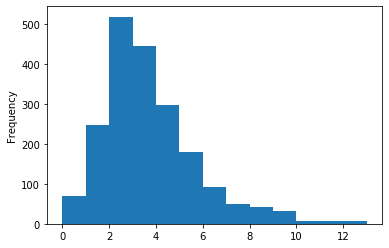

In [36]:
winners.losses.plot(kind = 'hist', bins = 13)

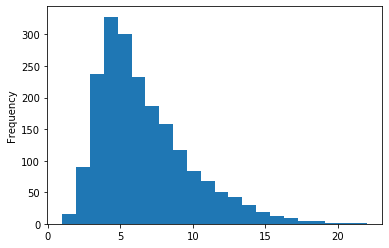

In [37]:
winners.wins.plot(kind = 'hist', bins = 22)

In [38]:
winners.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 3988
Data columns (total 19 columns):
fighter                   1993 non-null object
current_lose_streak       1993 non-null int64
current_win_streak        1993 non-null int64
avg_head_landed           1993 non-null float64
avg_KD                    1993 non-null float64
avg_sig_str_landed        1993 non-null float64
avg_td_landed             1993 non-null float64
avg_total_str_landed      1993 non-null float64
longest_winning_streak    1993 non-null int64
losses                    1993 non-null int64
total_title_bouts         1993 non-null int64
win_by_ko/tko             1993 non-null int64
wins                      1993 non-null int64
stance                    1993 non-null object
height_cms                1993 non-null float64
reach_cms                 1993 non-null float64
weight_lbs                1993 non-null float64
age                       1993 non-null float64
total_fights              1993 non-null int64

In [39]:
winners.to_csv('boxers.csv') 